### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

#### Importing Required Packages ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Dataset 'data.csv' as df####

In [2]:
df = pd.read_csv('data.csv')
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


In [3]:
df1 = df.copy()[['channelGrouping', 'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite', 'totals_transactionRevenue', 'totals_transactions']]
cg = pd.get_dummies(df1['channelGrouping'], prefix= 'cg')
df1 = pd.concat([cg, df1], axis=1)
df1 = df1.drop('channelGrouping', axis=1).fillna(0)
df1.head()

,cg_Affiliates,cg_Direct,cg_Display,cg_Organic Search,cg_Paid Search,cg_Referral,cg_Social,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions
0,0,0,0,1,0,0,0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0
1,0,0,0,0,0,1,0,0.0,2,0.0,2.0,2.0,28.0,0.0,0.0
2,0,1,0,0,0,0,0,0.0,2,1.0,2.0,1.0,38.0,0.0,0.0
3,0,0,0,1,0,0,0,0.0,2,1.0,2.0,1.0,1.0,0.0,0.0
4,0,0,0,1,0,0,0,0.0,2,1.0,2.0,1.0,52.0,0.0,0.0


#### Normalizing json data ####

In [4]:
a = pd.io.json.json_normalize(df['trafficSource'].apply(eval))
b = pd.io.json.json_normalize(df['geoNetwork'].apply(eval))
c = pd.io.json.json_normalize(df['device'].apply(eval))
import ast
df['hits'] = df['hits'].apply(ast.literal_eval).str[0]
df['hits'] =df['hits'].apply(lambda x: {'index':np.NaN,'value':np.NaN} if pd.isnull(x) else x)
d = pd.io.json.json_normalize(df['hits'])

### Exploring data in trafficsource column ###

In [5]:
for col in a.columns:
    print('column name = ', col)
    print(a[col].value_counts().head())
    print('_____________________________________________')

column name =  adContent
Google Merchandise Store          261
Google Merchandise Collection      72
Placement Accessores 300 x 250     24
Display Ad created 3/11/14         21
Full auto ad IMAGE ONLY            18
Name: adContent, dtype: int64
_____________________________________________
column name =  adwordsClickInfo.adNetworkType
Google Search    364
Content          266
Name: adwordsClickInfo.adNetworkType, dtype: int64
_____________________________________________
column name =  adwordsClickInfo.criteriaParameters
not available in demo dataset    20000
Name: adwordsClickInfo.criteriaParameters, dtype: int64
_____________________________________________
column name =  adwordsClickInfo.gclId
Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRLIyC4WoAABLm_mr4SI2fyuPXhlC4kX2y46BYNULOMoaAjKw8P8HAQ     3
CjwKEAjw-LLKBRCdhqmwtYmX93kSJAAORDM6K_vERGGpVExrh9ITmLoG1Ac8SdTNfUUUAU_WteWWUxoCKHrw_wcB       3
Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXROtX0_V-nHECSYZu446MB_hPBrEGRrCSBKQJsw4_DnkaAsiF8P8HAQ     2
CI2

#### Cleaning data in trafficsource ####

In [6]:
a['adContent'] = a.adContent.fillna('None')
a['adwordsClickInfo.adNetworkType'] = a['adwordsClickInfo.adNetworkType'].fillna('None')
p = a['adContent'].isin(a['adContent'].value_counts().index[a['adContent'].value_counts()<25])
a['adContent'] [p] = 'Other'
adContent = pd.get_dummies(a['adContent'], prefix= 'adContent')

a['adwordsClickInfo.adNetworkType'].value_counts()
adNetworkType = pd.get_dummies(a['adwordsClickInfo.adNetworkType'], prefix= 'adNetworkType')

source_list = ['google', 'facebook', 'yahoo', 'linkedin', 'youtube']
for source in source_list:
    a.loc[a['source'].str.contains(source), 'source'] = source
p = a['source'].isin(a['source'].value_counts().index[a['source'].value_counts()<25])
a['source'] [p] = 'other'
source = pd.get_dummies(a['source'], prefix= 'source')
medium = pd.get_dummies(a['medium'], prefix= 'medium')
trafficSource = pd.concat([adContent, adNetworkType, source, medium], axis = 1)

trafficSource.head()

,adContent_Google Merchandise Collection,adContent_Google Merchandise Store,adContent_None,adContent_Other,adNetworkType_Content,adNetworkType_Google Search,adNetworkType_None,source_(direct),source_Partners,source_baidu,...,source_reddit.com,source_siliconvalley.about.com,source_yahoo,source_youtube,medium_(none),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Visualizing trafficinfo ####

Combined Google and youtube sources contribute to over 50% of the website traffic, followed be users who visit the website directly.
Referal and organic media have lead to 10,000 users visiting the website.

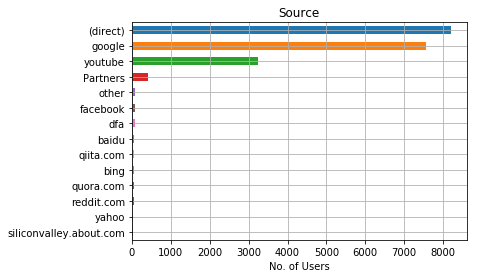

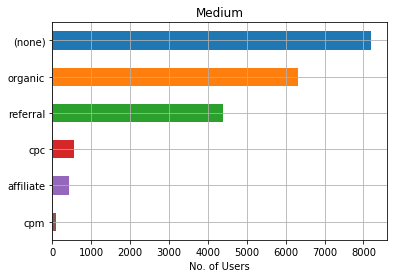

In [7]:
for i in a[['source', 'medium']]:
    plt.figure()
    plt.xlabel('No. of Users')
    plt.title(str.capitalize(i))
    a[i].value_counts().plot(kind='barh', grid = True)
    plt.gca().invert_yaxis()  

### Exploring data in geoNetwork column ###

In [8]:
for col in b.columns:
    print('column name = ', col)
    print(b[col].value_counts().head())
    print('_____________________________________________')

column name =  city
not available in demo dataset    11342
Mountain View                      942
(not set)                          749
New York                           584
San Francisco                      455
Name: city, dtype: int64
_____________________________________________
column name =  cityId
not available in demo dataset    20000
Name: cityId, dtype: int64
_____________________________________________
column name =  continent
Americas    10521
Europe       4511
Asia         4253
Africa        357
Oceania       337
Name: continent, dtype: int64
_____________________________________________
column name =  country
United States     8663
India             1081
United Kingdom     866
Canada             622
Japan              488
Name: country, dtype: int64
_____________________________________________
column name =  latitude
not available in demo dataset    20000
Name: latitude, dtype: int64
_____________________________________________
column name =  longitude
not available 

#### Cleaning data in geoNetwork ####

In [9]:
p = b['subContinent'].isin(b['subContinent'].value_counts().index[b['subContinent'].value_counts()<50])
b['subContinent'] [p] = 'other'
p = b['country'].isin(b['country'].value_counts().index[b['country'].value_counts()<100])
b['country'] [p] = 'other'
countries = pd.get_dummies(b['country'], prefix= 'country')
subContinents = pd.get_dummies(b['subContinent'], prefix= 'subContinent')
geo_network = pd.concat([countries, subContinents], axis = 1)

geo_network.head()

,country_Argentina,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Czechia,country_France,country_Germany,country_India,...,subContinent_Northern Europe,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,subContinent_other
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Visualizing geoNetwork data ####

 Graph indicates that >50% of the users in the dataset are from North, Central and South Americas.

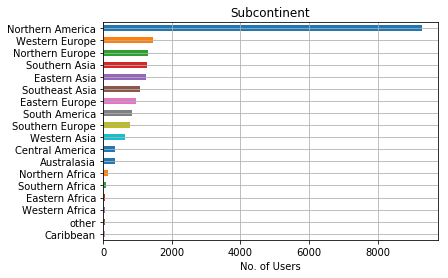

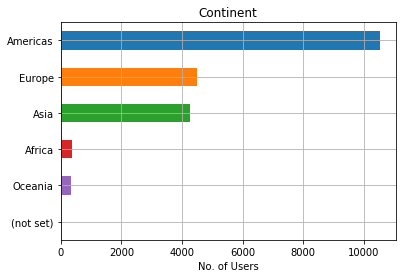

In [10]:
for i in b[['subContinent', 'continent']]:
    plt.figure()
    plt.xlabel('No. of Users')
    plt.title(str.capitalize(i))
    b[i].value_counts().plot(kind='barh', grid = True)
    plt.gca().invert_yaxis()  

In [11]:
for col in c.columns:
    print('column name = ', col)
    print(c[col].value_counts().head())
    print('_____________________________________________')

column name =  browser
Chrome               13978
Safari                3340
Firefox                829
Internet Explorer      530
Android Webview        300
Name: browser, dtype: int64
_____________________________________________
column name =  browserSize
not available in demo dataset    20000
Name: browserSize, dtype: int64
_____________________________________________
column name =  browserVersion
not available in demo dataset    20000
Name: browserVersion, dtype: int64
_____________________________________________
column name =  deviceCategory
desktop    13988
mobile      5284
tablet       728
Name: deviceCategory, dtype: int64
_____________________________________________
column name =  flashVersion
not available in demo dataset    20000
Name: flashVersion, dtype: int64
_____________________________________________
column name =  isMobile
False    13985
True      6015
Name: isMobile, dtype: int64
_____________________________________________
column name =  language
not available

#### Cleaning data in device column####

In [12]:
p = c['browser'].isin(c['browser'].value_counts().index[c['browser'].value_counts()<150])
c['browser'] [p] = 'other'
p = c['deviceCategory'].isin(c['deviceCategory'].value_counts().index[c['deviceCategory'].value_counts()<150])
c['deviceCategory'] [p] = 'other'
p = c['operatingSystem'].isin(c['operatingSystem'].value_counts().index[c['operatingSystem'].value_counts()<150])
c['operatingSystem'] [p] = 'other'
browsers = pd.get_dummies(c['browser'], prefix= 'browser')
deviceCategories = pd.get_dummies(c['deviceCategory'], prefix= 'device')
operatingSystems = pd.get_dummies(c['operatingSystem'], prefix= 'OS')
device_info = pd.concat([browsers.copy(), deviceCategories.copy(), operatingSystems.copy()], axis = 1)

device_info.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,browser_Android Webview,browser_Chrome,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Opera Mini,browser_Safari,browser_other,device_desktop,device_mobile,device_tablet,OS_Android,OS_Chrome OS,OS_Linux,OS_Macintosh,OS_Windows,OS_iOS,OS_other
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Visualizing Device Info data ###

Google Chrome is the most popular browser. The dataset contains more Desktop users over mobile users. Therefore Windows and Mac are the most common OS seen in this dataset.

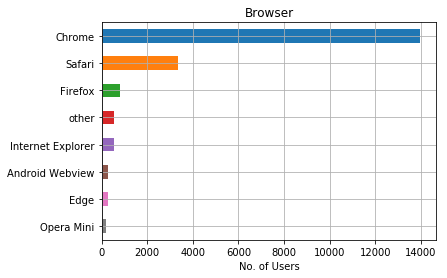

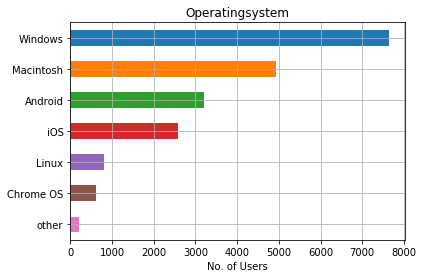

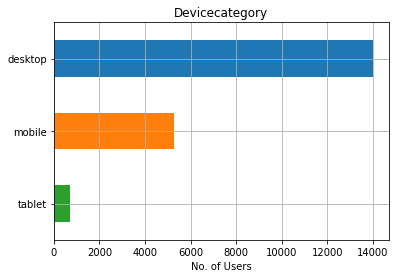

In [13]:
for i in c[['browser', 'operatingSystem', 'deviceCategory']]:
    plt.figure()
    plt.xlabel('No. of Users')
    plt.title(str.capitalize(i))
    c[i].value_counts().plot(kind='barh', grid = True)
    plt.gca().invert_yaxis()    

### Hits Column ###

In [14]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic

def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic

def complex_replace(x):
    dic = {}
    return resolve_json(dic, json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))
def replace(x):
    return  json.loads(x.replace('\'','\"').replace('False', 'false').replace('True'))

In [15]:
d['type'] = d['type'].map({'PAGE': 1, 'EVENT': 0})
d['type'] = d['type'].fillna(0)
d['Source_Web'] = d['dataSource'] == 'web'
d['Source_Web'] = d['Source_Web'].map({True: 1, False: 0})

hits = d[['type', 'Source_Web']]

### Channel Grouping Column ###

This column is converted into a one-hot vector using pd.get_dummies method.

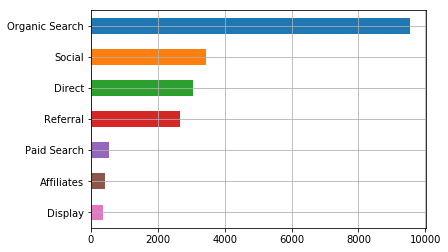

In [16]:
df['channelGrouping'].value_counts().plot(kind='barh', grid = True)
plt.gca().invert_yaxis()

 ### Custom Dimensions Column ###
 
 We will not be including the Custom Dimensions column for analysis because the data contained here is already available in a more granular level in the geoNetwork column. 

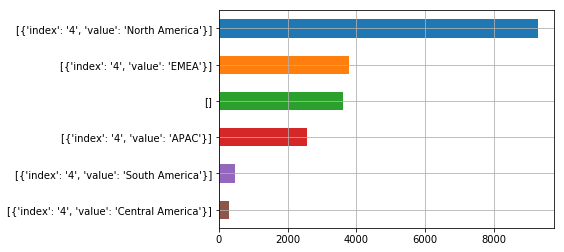

In [17]:
df['customDimensions'].value_counts().plot(kind='barh', grid = True)
plt.gca().invert_yaxis()

### Creating final dataframe for analysis ###

In [18]:
df_final = pd.concat([df1, device_info, geo_network, trafficSource, hits], axis=1).fillna(0)
df_final.head()

,cg_Affiliates,cg_Direct,cg_Display,cg_Organic Search,cg_Paid Search,cg_Referral,cg_Social,totals_bounces,totals_hits,totals_newVisits,...,source_yahoo,source_youtube,medium_(none),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,type,Source_Web
0,0,0,0,1,0,0,0,1.0,1,1.0,...,0,0,0,0,0,0,1,0,1.0,1
1,0,0,0,0,0,1,0,0.0,2,0.0,...,0,0,0,0,0,0,0,1,1.0,1
2,0,1,0,0,0,0,0,0.0,2,1.0,...,0,0,1,0,0,0,0,0,1.0,1
3,0,0,0,1,0,0,0,0.0,2,1.0,...,0,0,0,0,0,0,1,0,1.0,1
4,0,0,0,1,0,0,0,0.0,2,1.0,...,0,0,0,0,0,0,1,0,1.0,1


## Summary of df_final ##

df_final includes data from the following columns of 'data.csv'

1. channelGrouping - transformed into one-hot vectors.

2. device - transformed select data into one-hot vectors. Redundant / Data-Unavailable columns have been excluded.

3. trafficSource - transformed select data into one-hot vectors. Redundant / Data-Unavailable columns have been excluded.

4. geoNetwork - transformed select data into one-hot vectors. Redundant / Data-Unavailable columns have been excluded.

5. hits - selective columns within hits have be transformed appropriately and used in df_final.

6. df.socialEngagementType - All values are 'Not socially Engaged'. Therefore the column has been excluded.

7. totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',  'totals_sessionQualityDim', 'totals_timeOnSite,
    totals_transactions,totals_visits - The above columns have all been included.

8. totals_transactionRevenue - value to be predicted, hence included in the dataframe.

9. visitId', 'visitNumber', 'visitStartTime', 'date' - have been exluded for analysis as these values cannot be used in prediction.

10. customDimensions - the data contained here is already available in a more granular level in the geoNetwork column. Therefore this column has been exlcluded from the df_final dataframe.

In [19]:
df_final.iloc[:,:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 50 columns):
cg_Affiliates                20000 non-null uint8
cg_Direct                    20000 non-null uint8
cg_Display                   20000 non-null uint8
cg_Organic Search            20000 non-null uint8
cg_Paid Search               20000 non-null uint8
cg_Referral                  20000 non-null uint8
cg_Social                    20000 non-null uint8
totals_bounces               20000 non-null float64
totals_hits                  20000 non-null int64
totals_newVisits             20000 non-null float64
totals_pageviews             20000 non-null float64
totals_sessionQualityDim     20000 non-null float64
totals_timeOnSite            20000 non-null float64
totals_transactionRevenue    20000 non-null float64
totals_transactions          20000 non-null float64
browser_Android Webview      20000 non-null uint8
browser_Chrome               20000 non-null uint8
browser_Edge               

In [20]:
df_final.iloc[:,50:115].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 64 columns):
country_Netherlands                        20000 non-null uint8
country_Peru                               20000 non-null uint8
country_Philippines                        20000 non-null uint8
country_Poland                             20000 non-null uint8
country_Russia                             20000 non-null uint8
country_Singapore                          20000 non-null uint8
country_South Korea                        20000 non-null uint8
country_Spain                              20000 non-null uint8
country_Sweden                             20000 non-null uint8
country_Switzerland                        20000 non-null uint8
country_Taiwan                             20000 non-null uint8
country_Thailand                           20000 non-null uint8
country_Turkey                             20000 non-null uint8
country_United Kingdom                     20000 non-null u

## Evaluation Strategy ##

We will evaluate our model's goodness of fit (or Accuracy) using the **R-square** statistic. $R^2$ measures how successful the fit is in explaining the variation of the data.

** $R^2$ = 1 - SSE/SST **, where SSE = Sum of Squared Errors & SST = Total Sum of Squares

R-square should have a value between zero and one, with a score closer to one indicating a greater proportion of variance accounted for by the model. It is also possible to get a negative R-square if the fit is actually worse than just fitting a horizontal line.

##### Creating feature set, X & dependent variable, y (transactionRevenue) #####

In [21]:
X = df_final.drop('totals_transactionRevenue', axis=1)
y = df_final['totals_transactionRevenue']

##### Splitting dataset into Train and Test, followed by Feature Scaling  #####

Splitting the sample dataset into train set (75%) and test set (25%) (default values in sklearn). Setting Random State for reproducabilty of same results

In [22]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(X, y, random_state = 0)

Translate each feature individually using MinMax Scaler to essentially shrink the range such that it is between 0 and 1. 
Rescaling features for uniformity. However, the skewness of the distribution is maintained.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

## Supervised Learning Models ##

### 1. LASSO Regression (least absolute shrinkage and selection operator) using 5-Fold Cross Validation ###

Best parameters: {'alpha': 100, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.2054
Lasso Regression - Train Accuracy: 0.3131
Lasso Regression - Test Accuracy: 0.3068 


,alpha,fit_intercept,normalize
0,0.01,True,True
1,0.01,True,False
2,0.01,False,True
3,0.01,False,False
4,0.10,True,True
5,0.10,True,False
6,0.10,False,True
7,0.10,False,False
8,1.00,True,True
9,1.00,True,False


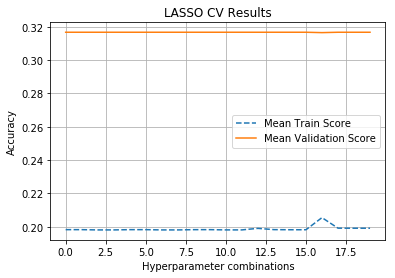

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

a_range = [10**-2, 10**-1, 10**0, 10**1, 10**2]

lassoreg = Lasso(random_state=0)
lasso_param = {'alpha':a_range ,'fit_intercept':[True,False],'normalize':[True,False]}

grid_search_lasso = GridSearchCV(lassoreg, lasso_param, cv=5, return_train_score=True, n_jobs = -1)
grid_search_lasso.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

lassoreg_accuracy_train = grid_search_lasso.best_estimator_.score(X_train, y_train)
lassoreg_accuracy_test = grid_search_lasso.best_estimator_.score(X_test, y_test)

print('Lasso Regression - Train Accuracy: %.4f'%lassoreg_accuracy_train)
print('Lasso Regression - Test Accuracy: %.4f '%lassoreg_accuracy_test)

plt.plot(np.arange(0, len(grid_search_lasso.cv_results_['mean_test_score'])), grid_search_lasso.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search_lasso.cv_results_['mean_train_score'])), grid_search_lasso.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('LASSO CV Results')
pd.DataFrame(grid_search_lasso.cv_results_['params'])

### 2. Linear Support Vector Regression using 5-Fold Cross Validation###

Best parameters: {'C': 0.1, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.2461
svr_linear Regression - Train Accuracy: 0.3003
svr_linear Regression - Test Accuracy: 0.3212 


,C,epsilon,loss
0,0.1,0.01,squared_epsilon_insensitive
1,0.1,0.10,squared_epsilon_insensitive
2,0.1,0.00,squared_epsilon_insensitive
3,0.1,1.00,squared_epsilon_insensitive
4,1.0,0.01,squared_epsilon_insensitive
5,1.0,0.10,squared_epsilon_insensitive
6,1.0,0.00,squared_epsilon_insensitive
7,1.0,1.00,squared_epsilon_insensitive
8,10.0,0.01,squared_epsilon_insensitive
9,10.0,0.10,squared_epsilon_insensitive


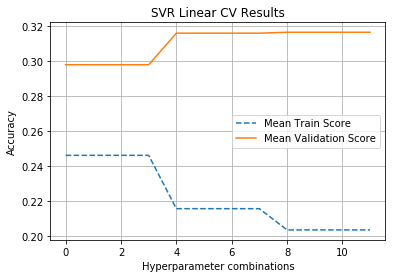

In [25]:
from sklearn.svm import LinearSVR

e_range = [10**-2, 10**-1, 0, 10**0]
C_range = [10**-1, 10**0, 10**1]

svr_linearreg = LinearSVR(random_state=0)
svr_linear_param = {'epsilon':e_range ,'C':C_range, 'loss': ['squared_epsilon_insensitive']}

grid_search_svr_linear = GridSearchCV(svr_linearreg, svr_linear_param, cv=5, return_train_score=True, n_jobs = -1)
grid_search_svr_linear.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svr_linear.best_score_))

svr_linearreg_accuracy_train = grid_search_svr_linear.best_estimator_.score(X_train, y_train)
svr_linearreg_accuracy_test = grid_search_svr_linear.best_estimator_.score(X_test, y_test)

print('svr_linear Regression - Train Accuracy: %.4f'%svr_linearreg_accuracy_train)
print('svr_linear Regression - Test Accuracy: %.4f '%svr_linearreg_accuracy_test)

plt.plot(np.arange(0, len(grid_search_svr_linear.cv_results_['mean_test_score'])), grid_search_svr_linear.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search_svr_linear.cv_results_['mean_train_score'])), grid_search_svr_linear.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('SVR Linear CV Results')
pd.DataFrame(grid_search_svr_linear.cv_results_['params'])

### Supervised Learning Models - Summary ###

A 5-fold cross for the least absolute shrinkage and selection operator (LASSO) reveals that the parameter alpha = 100 yields the best accuracy for this algorithm when predicting transcation revenue in this dataset. We obtain R-square of 0.3436 with this model.

A 5-fold cross for the linear support vector regressor reveals that C = 1 and epsilon = 0 yield the best accuracy for predicting transcation revenue in this dataset. We obtain R-square of 0.3439 with this model.

## Unsupervised Learning Models ##

### K-Means Clustering ###

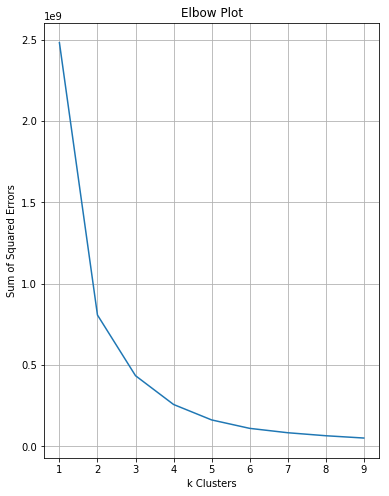

In [26]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure(figsize=(6,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Elbow Plot")
plt.xlabel("k Clusters")
plt.ylabel("Sum of Squared Errors")
plt.grid(True)
plt.show()

In [27]:
# Based on elbow test we finalize on 5-1 = 4 clusters,
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(X)

In [28]:
df_final['clusters'] = kmeans.labels_

In [29]:
df_final['clusters'].value_counts()

1    17508
3     1836
0      582
2       74
Name: clusters, dtype: int64

In [30]:
df_final.groupby(['clusters']).mean().sort_values(by = 'totals_hits', ascending = True)

,cg_Affiliates,cg_Direct,cg_Display,cg_Organic Search,cg_Paid Search,cg_Referral,cg_Social,totals_bounces,totals_hits,totals_newVisits,...,source_yahoo,source_youtube,medium_(none),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,type,Source_Web
clusters,,,,,,,,,,,,,,,,,,,,,
1,0.021133,0.150388,0.019305,0.475840,0.024846,0.119317,0.189171,0.563914,2.882511,0.770790,...,0.001542,0.178661,0.396048,0.021133,0.027987,0.004512,0.314885,0.235435,0.998115,0.560772
3,0.024510,0.161765,0.009259,0.486383,0.041939,0.210240,0.065904,0.000000,15.907952,0.665033,...,0.001634,0.056100,0.495643,0.024510,0.030501,0.004357,0.334967,0.110022,0.995098,0.558824
0,0.017182,0.178694,0.010309,0.469072,0.024055,0.269759,0.030928,0.000000,22.001718,0.584192,...,0.001718,0.027491,0.541237,0.017182,0.020619,0.006873,0.302405,0.111684,0.986254,0.546392
2,0.000000,0.175676,0.013514,0.513514,0.013514,0.229730,0.054054,0.000000,46.081081,0.432432,...,0.000000,0.040541,0.527027,0.000000,0.013514,0.000000,0.337838,0.121622,1.000000,0.540541


#### CLUSTER DESCRIPTION #####

CLUSTER 0 : Largest cluster. These users are mostly first time visiters and contribute almost zero revenue on average.
Predominantly consists of Mobile device users with the highest bounce rate and the least number of page views, the least time spent on website. 
Windows Desktop users of this cluster outnumber Mac users. The cluster also has the poorest average session quality.

CLUSTER 1 : Predominantly consists of Windows and Mac desktop users with the highest number of page views and the highest time spent on website. 
These users are almost never first time visiters and contribute the maximimum revenue. The cluster also has the best average session quality.

CLUSTER 2 : Smallest cluster haiving only 74 users. Relativley newer users who spend slightly more time on site than cluster 0.
Cluster generates second highest average revenue.

CLUSTER 3 : This cluster responds best to paid search channels and direct mails. PC users in this cluster outnumber mobile users. 
They generate more revenue than cluster 0 but  not clusters 1 and 2.


##### NOTE: Cluster Numbers change on re-running code, but clusters reamin same #####

### Dimesion Reduction using Principal Component Analysis ###

In [31]:
X_s = MinMaxScaler().fit_transform(X)

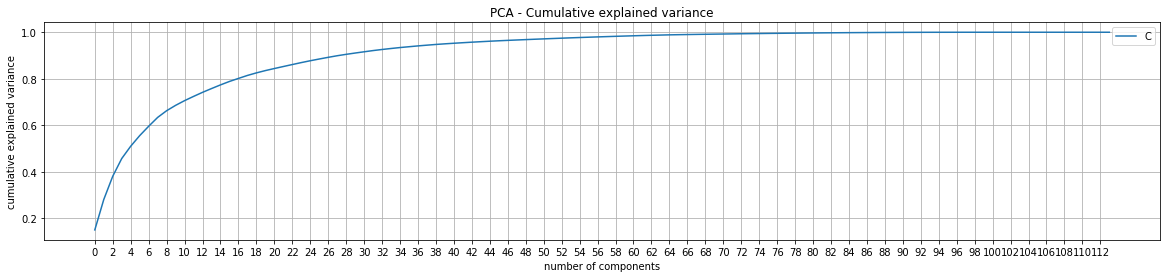

In [32]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_s)
plt.figure(figsize=(20,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0, len(np.cumsum(pca.explained_variance_ratio_)), 2))
plt.grid(True)
plt.legend('Cumulative Variance')

#### Number of Components explaining at least 90% of the cumulative variance ####

In [33]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
n_components

40

In [34]:
pca = PCA(n_components)
pca.fit(X_s)
X_pca = pca.transform(X_s)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, random_state = 0)

### LASSO Regression with CV using n_components from PCA ###

Best parameters: {'alpha': 100, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.2054
Lasso after PCA - Train Accuracy: 0.0134
Lasso after PCA - Test Accuracy: 0.0150 


,alpha,fit_intercept,normalize
0,0.01,True,True
1,0.01,True,False
2,0.01,False,True
3,0.01,False,False
4,0.10,True,True
5,0.10,True,False
6,0.10,False,True
7,0.10,False,False
8,1.00,True,True
9,1.00,True,False


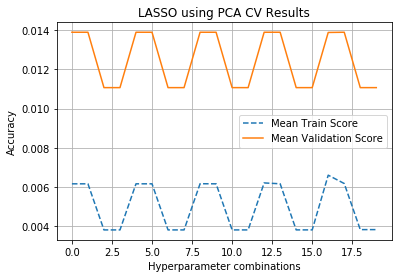

In [35]:
lassopca = Lasso(random_state=0)
lassopca_param = {'alpha':a_range ,'fit_intercept':[True,False],'normalize':[True,False]}

grid_search_lassopca = GridSearchCV(lassopca, lassopca_param, cv=5, return_train_score=True, n_jobs = -1)
grid_search_lassopca.fit(X_pca_train, y_pca_train)
print("Best parameters: {}".format(grid_search_lassopca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

lassopca_accuracy_train = grid_search_lassopca.best_estimator_.score(X_pca_train, y_pca_train)
lassopca_accuracy_test = grid_search_lassopca.best_estimator_.score(X_pca_test, y_pca_test)

print('Lasso after PCA - Train Accuracy: %.4f'%lassopca_accuracy_train)
print('Lasso after PCA - Test Accuracy: %.4f '%lassopca_accuracy_test)

plt.plot(np.arange(0, len(grid_search_lassopca.cv_results_['mean_test_score'])), grid_search_lassopca.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search_lassopca.cv_results_['mean_train_score'])), grid_search_lassopca.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('LASSO using PCA CV Results')
pd.DataFrame(grid_search_lasso.cv_results_['params'])

### 2. Linear Support Vector Regression with CV using n_components from PCA ###

Best parameters: {'C': 0.1, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.0062
svr_linear Regression after PCA - Train Accuracy: 0.0134
svr_linear Regression after PCA - Test Accuracy: 0.0148 


,C,epsilon,loss
0,0.1,0.01,squared_epsilon_insensitive
1,0.1,0.10,squared_epsilon_insensitive
2,0.1,0.00,squared_epsilon_insensitive
3,0.1,1.00,squared_epsilon_insensitive
4,1.0,0.01,squared_epsilon_insensitive
5,1.0,0.10,squared_epsilon_insensitive
6,1.0,0.00,squared_epsilon_insensitive
7,1.0,1.00,squared_epsilon_insensitive
8,10.0,0.01,squared_epsilon_insensitive
9,10.0,0.10,squared_epsilon_insensitive


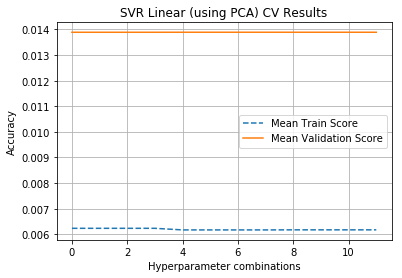

In [36]:
from sklearn.svm import LinearSVR

e_range = [10**-2, 10**-1, 0, 10**0]
C_range = [10**-1, 10**0, 10**1]

svr_linearpca = LinearSVR(random_state=0)
svr_linearpca_param = {'epsilon':e_range ,'C':C_range, 'loss': ['squared_epsilon_insensitive']}

grid_search_svr_linearpca = GridSearchCV(svr_linearpca, svr_linear_param, cv=5, return_train_score=True, n_jobs = -1)
grid_search_svr_linearpca.fit(X_pca_train, y_pca_train)
print("Best parameters: {}".format(grid_search_svr_linearpca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_svr_linearpca.best_score_))

svr_linearpca_accuracy_train = grid_search_svr_linearpca.best_estimator_.score(X_pca_train, y_pca_train)
svr_linearpca_accuracy_test = grid_search_svr_linearpca.best_estimator_.score(X_pca_test, y_pca_test)

print('svr_linear Regression after PCA - Train Accuracy: %.4f'%svr_linearpca_accuracy_train)
print('svr_linear Regression after PCA - Test Accuracy: %.4f '%svr_linearpca_accuracy_test)

plt.plot(np.arange(0, len(grid_search_svr_linearpca.cv_results_['mean_test_score'])), grid_search_svr_linearpca.cv_results_['mean_test_score'], '--', label = 'Mean Train Score')
plt.plot(np.arange(0, len(grid_search_svr_linearpca.cv_results_['mean_train_score'])), grid_search_svr_linearpca.cv_results_['mean_train_score'], '-', label = 'Mean Validation Score')
plt.legend()
plt.grid(True)
plt.xlabel('Hyperparameter combinations')
plt.ylabel('Accuracy')
plt.title('SVR Linear (using PCA) CV Results')
pd.DataFrame(grid_search_svr_linearpca.cv_results_['params'])

In [37]:
conclusion=pd.DataFrame(
    {'Model':['LASSO','SVM Linear','LASSO - PCA','SVM Linear - PCA'],
     'Hyperparameters': [grid_search_lasso.best_estimator_, grid_search_svr_linear.best_estimator_, grid_search_lassopca.best_estimator_, grid_search_svr_linearpca.best_estimator_],
     'Train Accuracy':[lassoreg_accuracy_train, svr_linearreg_accuracy_train, lassopca_accuracy_train, svr_linearpca_accuracy_train],
     'Test Accuracy':[lassoreg_accuracy_test, svr_linearreg_accuracy_test, lassopca_accuracy_test, svr_linearpca_accuracy_test],
     })

## CONCLUSION ##

Both LASSO and SVR-Linear models provide similar accuracy scores ($R^2$) of 0.34 when fitted directly on the dataset.
However when using the Principal components as features, the $R^2$ reduced to less than 0.02 in both the LASSO and SVR Linear Models.

In [38]:
conclusion

,Model,Hyperparameters,Train Accuracy,Test Accuracy
0,LASSO,"Lasso(alpha=100, copy_X=True, fit_intercept=Tr...",0.313119,0.306825
1,SVM Linear,"LinearSVR(C=0.1, dual=True, epsilon=0, fit_int...",0.300314,0.321237
2,LASSO - PCA,"Lasso(alpha=100, copy_X=True, fit_intercept=Tr...",0.013418,0.015021
3,SVM Linear - PCA,"LinearSVR(C=0.1, dual=True, epsilon=0, fit_int...",0.013431,0.014834
